In [1]:
# GridSearchCVの結果をヒートマップで表示する。
def plot_heatmap_from_grid(grid):
    # チューニング対象のパラメータを特定する。
    params = [k for k in grid.cv_results_.keys() if k.startswith('param_')]
    if len(params) != 2: raise Exception('grid has to have exact 2 parameters.') 

    # ヒートマップの行、列、値に使うキーを定義する。
    index = params[0]
    columns = params[1]
    values = 'mean_test_score'

    # gridから必要なキーのみを抽出する。
    df_dict = {k: grid.cv_results_[k] for k in grid.cv_results_.keys() & {index, columns, values}}

    # dictをDataFrameに変換してseabornでヒートマップを表示する。
    import pandas as pd
    df = pd.DataFrame(df_dict)
    data = df.pivot(index=index, columns=columns, values=values)
    import seaborn as sns
    sns.heatmap(data, annot=True, fmt='.3f')

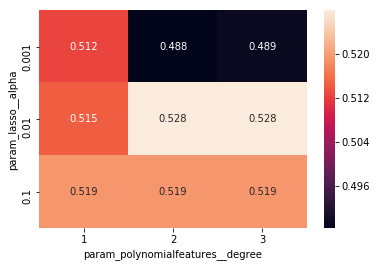

In [2]:
%matplotlib inline

# ヒートマップの表示例
# diabetesデータに対して、多項式特徴量（PolynomialFeatures）を追加して線形モデル（Lasso）で回帰を行う。
# GridSearchCVを使って、多項式特徴量の次数（degree）と線形モデルの正則化パラメータ（alpha）をチューニングする。
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
pipe = make_pipeline(PolynomialFeatures(), Lasso())
param_grid = {'polynomialfeatures__degree': [1, 2, 3], 'lasso__alpha': [0.001, 0.01, 0.1]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

plot_heatmap_from_grid(grid)